# Applied Data Science Capstone

## Introduction/Business Problem

The Seattle government is concerned with the severity and number of accidents and wants to employ actions based on the analysis of historical data to alert drivers of the imminence of accidents.

This study aims to predict the severity of an accident, given the locations, weather and road conservation.

The analysis aims to determine a set of possible causes that contribute to the increase in the severity of accidents to allow preventive actions by road users.

The targets audience of the project are drivers, rescue groups, police and insurance companys.

It's expected to achieve a reduction in the number and severity of accidents to make drivers and passengers more secure.

## About dataset

This dataset is about collisions that occurred between 2004 and 2020 in the city of Seattle. The __Data-Collisions.csv__ data set includes details of 194673 collisions provided by the Seattle Department of Transportation Traffic Management Division.

It includes following fields:

| Field | Description |
| --- | --- |
| OBJECTID | ESRI unique identifier |
| LATITUDE | ESRI geometry field |
| LONGITUDE | ESRI geometry field |
| ADDRTYPE | Collision address type (Alley/Block/Intersection) |
| INTKEY | Key that corresponds to the intersection associated with a collision |
| LOCATION | Description of the general location of the collision |
| SEVERITYCODE | A code that corresponds to the severity of the collision (3 — fatality/2b — serious injury/2—injury/1 — prop damage/0 — unknown) |
| SEVERITYDESC | A detailed description of the severity of the collision |
| COLLISIONTYPE | Collision type |
| PERSONCOUNT | The total number of people involved in the collision |
| PEDCOUNT | The number of pedestrians involved in the collision |
| PEDCYLCOUNT | The number of bicycles involved in the collision |
| VEHCOUNT | The number of vehicles involved in the collision |
| INJURIES | The number of total injuries in the collision |
| SERIOUSINJURIES | The number of serious injuries in the collision |
| FATALITIES | The number of fatalities in the collision |
| INCDTTM | The date and time of the incident |
| JUNCTIONTYPE | Category of junction at which collision took place |
| SDOT_COLDESC | A description of the collision corresponding to the collision code |
| INATTENTIONIND | Whether or not collision was due to inattention (Y/N) |
| UNDERINFL | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER | A description of the weather conditions during the time of the collision |
| ROADCOND | The condition of the road during the collision |
| LIGHTCOND | The light conditions during the collision |
| PEDROWNOTGRNT | Whether or not the pedestrian right of way was not granted (Y/N) |
| SPEEDING | Whether or not speeding was a factor in the collision (Y/N) |
| SEGLANEKEY | A key for the lane segment in which the collision occurred |
| CROSSWALKKEY | A key for the crosswalk at which the collision occurred |
| HITPARKEDCAR | Whether or not the collision involved hitting a parked car (Y/N) |


## Methodology

### Reading and saving the Data 

Downloading the data set and loading the data from the CSV file

In [1]:
# Import pandas library
import pandas as pd
# Read the online file by the URL and assign it to variable "df"
# url = 'https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
url = "Data-Collisions.csv"
df = pd.read_csv(url, low_memory=False)

In [2]:
# Save the dataset to csv
df.to_csv("Data-Collisions.csv", index=False)

In [3]:
# show the first 5 rows using dataframe.head() method
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [4]:
# Get a statistical summary
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214050.000000,214050.000000,221525.000000,221525.000000,221525.000000,71936.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221524.000000,1.272050e+05,221525.000000,2.215250e+05
mean,-122.330756,47.620196,110763.000000,144824.873233,145053.886627,37626.275537,2.226941,0.038118,0.027360,1.730482,0.373935,0.015208,0.001693,13.383042,7.971063e+06,261.135903,9.577244e+03
std,0.030056,0.056048,63948.903529,89222.567072,89598.173976,51968.207339,1.470050,0.201766,0.164537,0.829754,0.732077,0.158052,0.044888,7.300182,2.611523e+06,3246.962907,7.146156e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577133,55382.000000,71668.000000,71668.000000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110763.000000,127252.000000,127252.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166144.000000,209935.000000,210155.000000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221525.000000,334020.000000,335520.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
# A concise summary of your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   OBJECTID         221525 non-null  int64  
 3   INCKEY           221525 non-null  int64  
 4   COLDETKEY        221525 non-null  int64  
 5   REPORTNO         221525 non-null  object 
 6   STATUS           221525 non-null  object 
 7   ADDRTYPE         217813 non-null  object 
 8   INTKEY           71936 non-null   float64
 9   LOCATION         216935 non-null  object 
 10  EXCEPTRSNCODE    101122 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221524 non-null  object 
 13  SEVERITYDESC     221525 non-null  object 
 14  COLLISIONTYPE    195212 non-null  object 
 15  PERSONCOUNT      221525 non-null  int64  
 16  PEDCOUNT         221525 non-null  int6

In [6]:
df.shape

(221525, 40)

### Data Wrangling

In [7]:
import numpy as np

In [8]:
# Evaluating for Missing Data
missing_data = df.isnull()
missing_data.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,False,True,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

X
False    214050
True       7475
Name: X, dtype: int64

Y
False    214050
True       7475
Name: Y, dtype: int64

OBJECTID
False    221525
Name: OBJECTID, dtype: int64

INCKEY
False    221525
Name: INCKEY, dtype: int64

COLDETKEY
False    221525
Name: COLDETKEY, dtype: int64

REPORTNO
False    221525
Name: REPORTNO, dtype: int64

STATUS
False    221525
Name: STATUS, dtype: int64

ADDRTYPE
False    217813
True       3712
Name: ADDRTYPE, dtype: int64

INTKEY
True     149589
False     71936
Name: INTKEY, dtype: int64

LOCATION
False    216935
True       4590
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    101122
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209746
False     11779
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    221524
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    221525
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    195212
True      26313
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    22

In [10]:
df = df.dropna(subset=["SEVERITYCODE"], axis=0)

In [11]:
df.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INCDATE", "JUNCTIONTYPE", "SDOT_COLCODE", "SDOTCOLNUM", "ST_COLDESC"], axis=1, inplace=True)

In [12]:
df.shape

(221524, 27)

In [13]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
LOCATION            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDTTM             object
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SPEEDING            object
ST_COLCODE          object
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR        object
dtype: object

Convert data types to proper format

In [14]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM'].head()

0   2013-03-14 17:30:00
1   2006-01-15 17:35:00
2   2019-09-09 15:32:00
3   2019-12-19 00:00:00
4   2013-03-27 00:00:00
Name: INCDTTM, dtype: datetime64[ns]

In [15]:
df.columns.values

array(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'INCDTTM',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], dtype=object)

In [16]:
df['YEARS'] = pd.DatetimeIndex(df['INCDTTM']).year
years = df['YEARS']
years = years.tolist()
years

[2013,
 2006,
 2019,
 2019,
 2013,
 2005,
 2020,
 2013,
 2006,
 2013,
 2013,
 2013,
 2006,
 2019,
 2007,
 2004,
 2019,
 2013,
 2020,
 2019,
 2019,
 2013,
 2004,
 2013,
 2005,
 2019,
 2006,
 2004,
 2005,
 2005,
 2019,
 2013,
 2006,
 2019,
 2019,
 2005,
 2020,
 2004,
 2005,
 2007,
 2019,
 2013,
 2004,
 2020,
 2020,
 2013,
 2006,
 2019,
 2020,
 2019,
 2013,
 2004,
 2013,
 2013,
 2019,
 2007,
 2004,
 2006,
 2004,
 2019,
 2013,
 2004,
 2013,
 2004,
 2019,
 2006,
 2005,
 2006,
 2004,
 2019,
 2013,
 2004,
 2004,
 2006,
 2020,
 2019,
 2013,
 2013,
 2013,
 2005,
 2019,
 2005,
 2005,
 2004,
 2007,
 2019,
 2013,
 2019,
 2005,
 2019,
 2013,
 2013,
 2020,
 2006,
 2006,
 2006,
 2019,
 2013,
 2019,
 2006,
 2020,
 2020,
 2013,
 2006,
 2019,
 2020,
 2019,
 2013,
 2005,
 2008,
 2013,
 2019,
 2006,
 2005,
 2006,
 2004,
 2013,
 2013,
 2020,
 2013,
 2005,
 2019,
 2007,
 2005,
 2005,
 2004,
 2019,
 2014,
 2013,
 2019,
 2019,
 2013,
 2020,
 2004,
 2006,
 2005,
 2019,
 2013,
 2005,
 2020,
 2020,
 2004,
 2019,

In [17]:
df1 = df[['YEARS', 'SERIOUSINJURIES', 'FATALITIES']]
#df1.groupby(['YEARS','INJURIES', 'SERIOUSINJURIES', 'FATALITIES']).sum()
df_years_severity = df1.groupby(years)['SERIOUSINJURIES', 'FATALITIES'].sum().transpose()
df_years_severity

<ipython-input-17-a9073a2f7622>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_years_severity = df1.groupby(years)['SERIOUSINJURIES', 'FATALITIES'].sum().transpose()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
SERIOUSINJURIES,0,243,223,318,263,205,214,210,155,182,180,185,189,174,173,192,177,86
FATALITIES,0,30,30,42,14,20,24,20,11,22,24,18,21,24,21,14,26,14


In [18]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

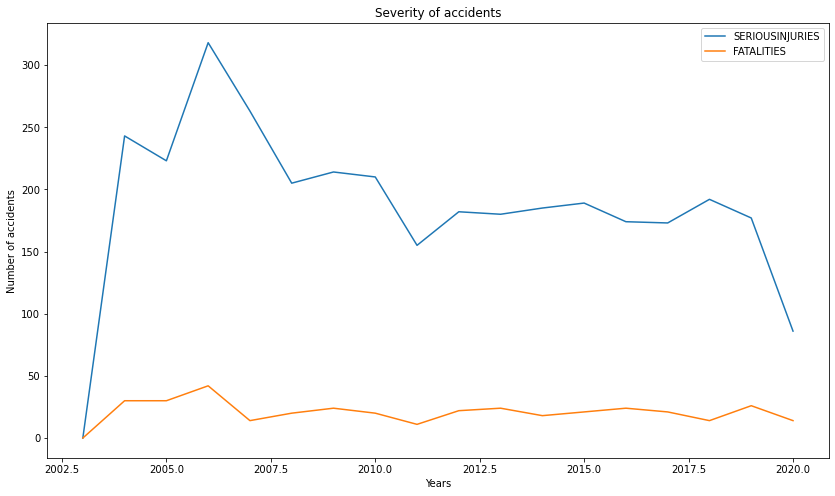

In [19]:
#df_years_severity.index = df_years_severity.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_years_severity = df_years_severity.transpose()
df_years_severity.plot(kind='line', figsize=(14,8))
plt.title('Severity of accidents')
plt.ylabel('Number of accidents')
plt.xlabel('Years')
plt.show()

In [20]:
import folium

In [21]:
injuries = df['INJURIES'].sum()
injuries

82836

In [22]:
serious_injuries = df['SERIOUSINJURIES'].sum()
serious_injuries

3369

In [23]:
fat_count = df['FATALITIES'].sum()
fat_count

375

In [24]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137671
Injury Collision                   58783
Unknown                            21615
Serious Injury Collision            3105
Fatality Collision                   350
Name: SEVERITYDESC, dtype: int64

In [25]:
avg_longitude = df["X"].astype("float").mean(axis=0)
avg_latitude = df["Y"].astype("float").mean(axis=0)
df_incidents = df.dropna(subset=["X", "Y"], axis=0)
df_incidents_graves = df_incidents.loc[df_incidents['SEVERITYCODE'] == '3']

In [26]:
# define the world map
world_map = folium.Map(location=[round(avg_latitude, 2), round(avg_longitude, 2)], zoom_start=10, tiles='OpenStreetMap')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents_graves.Y, df_incidents_graves.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# display world map
world_map.add_child(incidents)

In [27]:
df['ADDRTYPE'].value_counts()

Block           144999
Intersection     71935
Alley              878
Name: ADDRTYPE, dtype: int64

In [28]:
locations = df.pivot_table(index=['LOCATION'], aggfunc='size')
locations.sort_values(ascending=False).head()

LOCATION
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          297
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    283
6TH AVE AND JAMES ST                                              276
dtype: int64

In [29]:
df['COLLISIONTYPE'].value_counts().head()

Parked Car    48551
Angles        35573
Rear Ended    34691
Other         24588
Sideswipe     18891
Name: COLLISIONTYPE, dtype: int64

In [30]:
collision_descr = df.pivot_table(index=['SDOT_COLDESC'], aggfunc='size')
collision_descr.sort_values(ascending=False).head()

SDOT_COLDESC
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE     92089
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END               59300
NOT ENOUGH INFORMATION / NOT APPLICABLE                    19158
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE    10935
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT               9599
dtype: int64